<a href="https://colab.research.google.com/github/Pravallika-Myneni/WDL-stage-3/blob/main/WDL_stage_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable


## External links and resources
Paste here all the links to external resources that are necessary to understand and run your code. Add descriptions to make it clear how to use them during evaluation.

https://www.kdnuggets.com/2017/10/7-techniques-visualize-geospatial-data.html

https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/


https://www.openstreetmap.org/search?query=portugal#map=6/36.234/-18.873

https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb

## Introduction
Describe how you framed the challenge by telling us what problem are you trying to solve and how your solution solves that problem.

https://drive.google.com/file/d/1aWL7pxTWWqxI0DA4NpsJCySJI5GCgAb4/view

## Development
Start coding here! 👩‍💻

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.

### Installing the libraries required

In [1]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,657 kB/s)
Selecting previously unselected

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px

In [3]:
!git clone --recursive https://github.com/Pravallika-Myneni/WDL-stage-3.git

Cloning into 'WDL-stage-3'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [4]:
!ls WDL-stage-3

2018_RedeOficialCML.cpg       LisbonDistricts_Geom_Population.geojson
2018_RedeOficialCML.dbf       Mapa_Declives_Lisboa_RFelix.pdf
2018_RedeOficialCML.prj       README.md
2018_RedeOficialCML.qpj       RedeViariaDeclives.prj
2018_RedeOficialCML.shp       RedeViariaDeclives.shp
2018_RedeOficialCML.shx       RedeViariaDeclives.shp.xml
Ciclovias.geojson	      RedeViariaDeclives.shx
INFO_CITARCOMO.txt	      TravelSurveyLisbon.geojson
LisbonCyclingNetwork.geojson


In [5]:
#Reading Lisbon Cycling Network data
LisbonCyclingNetwork = gpd.read_file('/content/WDL-stage-3/LisbonCyclingNetwork.geojson')
LisbonCyclingNetwork.columns

Index(['id', 'nome', 'tipo', 'data_alt', 'length', 'geometry'], dtype='object')

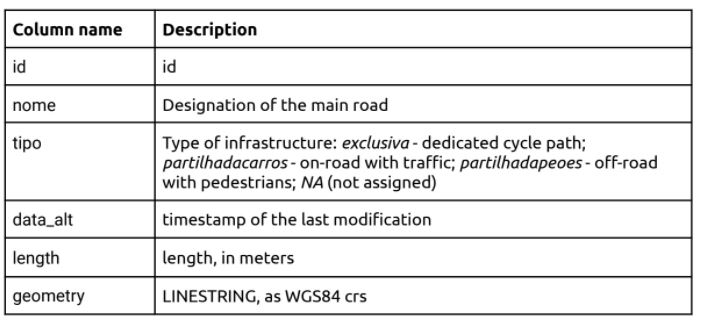

In [6]:
cn = gpd.read_file('/content/WDL-stage-3/2018_RedeOficialCML.shp')
cn.head(4)

,OBJECTID,COD_SIG_TR,COD_VIA,DESIGNACAO,HIERARQUIA,EIXO,TIPOLOGIA,SITUACAO,DUPL_TROC,ZONA,COMPRIMENT,IDTIPO,FREGUESIA,ZONAMENTO,ANO,TIPOLOGIA_,ESTADO_AML,F_PRINCIPA,Shape_Le_1,geometry
0,1423,4506,67007,Avenida Sacadura Cabral,Local,None,30+Bici,Executado,S,Planalto,134.26,9196,Areeiro,Roma-Campo Pequeno,2017,Via banalizada,Executado,Via destinada a funcoes quotidianas,134.259227,"LINESTRING (-87798.883 -102136.663, -87921.781..."
1,332,152704,101064,Avenida Cidade de Praga,Principal,Circular Exterior,Pistas Cicláveis Unidirecionais,Executado,S,ZON,30.32,9196,Carnide,Avenida Cidade de Praga,2017,Pista ciclavel (ciclovia),Executado,Via destinada a funcoes quotidianas,30.323767,"LINESTRING (-92031.527 -100269.342, -92049.996..."
2,1407,A000008,A000008,Avenida Calouste Gulbenkian - Parque Eduardo V...,Complementar,None,Pista Ciclável Bidirecional,Executado,N,-,996.65,9196,Campolide,None,2010,Pista ciclavel (ciclovia),Executado,Via destinada a funcoes quotidianas,996.647712,"LINESTRING (-89630.458 -103086.967, -89619.970..."
3,341,7068,34341,Praça do Marquês de Pombal,Principal,Central,Pista Ciclável Bidirecional,Executado,N,DEP/DMM,87.25,9196,Santo António,None,2013,Pista ciclavel (ciclovia),Executado,Via destinada a funcoes quotidianas,87.245319,"LINESTRING (-88524.140 -104212.292, -88521.890..."


In [7]:
cn.shape

(648, 20)

In [9]:
CyclingNetwork = gpd.read_file('/content/WDL-stage-3/Ciclovias.geojson')
print(cn.columns)
CyclingNetwork.columns


Index(['OBJECTID', 'COD_SIG_TR', 'COD_VIA', 'DESIGNACAO', 'HIERARQUIA', 'EIXO',
       'TIPOLOGIA', 'SITUACAO', 'DUPL_TROC', 'ZONA', 'COMPRIMENT', 'IDTIPO',
       'FREGUESIA', 'ZONAMENTO', 'ANO', 'TIPOLOGIA_', 'ESTADO_AML',
       'F_PRINCIPA', 'Shape_Le_1', 'geometry'],
      dtype='object')


Index(['OBJECTID', 'COD_VIA', 'DESIGNACAO', 'HIERARQUIA', 'EIXO', 'TIPOLOGIA',
       'SITUACAO', 'IDTIPO', 'SE_ANNO_CAD_DATA', 'GlobalID', 'Shape__Length',
       'geometry'],
      dtype='object')

In [11]:
CyclingNetwork.shape

(715, 12)

In [12]:
CyclingNetwork.head(4)

,OBJECTID,COD_VIA,DESIGNACAO,HIERARQUIA,EIXO,TIPOLOGIA,SITUACAO,IDTIPO,SE_ANNO_CAD_DATA,GlobalID,Shape__Length,geometry
0,1,5968,Passeio dos Heróis do Mar,Local,None,Percurso Ciclopedonal,Executado,9196,,308b49ce-f21a-42b6-ac84-f0540386c6ea,111.713149,"LINESTRING (-9.09361 38.78296, -9.09356 38.782..."
1,6,100031,Campo Grande,Principal,Central,Pista Ciclável Bidirecional,Executado,9196,,4be232fd-020b-4c76-a59d-2215a65303f6,21.699444,"LINESTRING (-9.14832 38.74798, -9.14819 38.748..."
2,7,None,Troço da Frente Ribeirinha,Local,None,Pista Ciclável Bidirecional,Executado,9196,,9e92db5e-fc33-4820-bfe5-5a00f93736e5,381.321124,"LINESTRING (-9.21315 38.69341, -9.21315 38.693..."
3,8,67013,Rua Edison,Local,None,30+Bici,Executado,9196,,b5fbb69f-24e6-4181-930c-3fe6c43b7e0f,139.004179,"LINESTRING (-9.13894 38.74409, -9.13885 38.744..."


In [13]:
#Reading district population data
LisbonDistricts_Geom_Population = gpd.read_file('/content/WDL-stage-3/LisbonDistricts_Geom_Population.geojson')
LisbonDistricts_Geom_Population.columns

Index(['Dicofre', 'DistrictName', 'Population2011', 'geometry'], dtype='object')

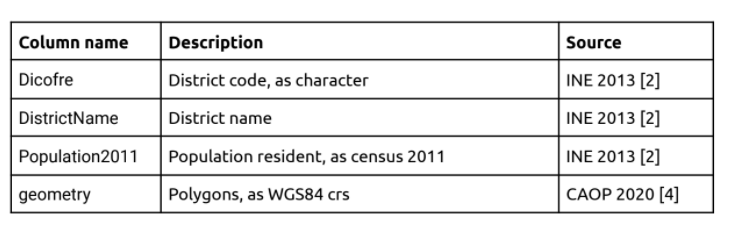

In [14]:
#Reading travel survey data
TravelSurveyLisbon = gpd.read_file('/content/WDL-stage-3/TravelSurveyLisbon.geojson')
TravelSurveyLisbon.columns

Index(['DicofreOR', 'DicofreDE', 'Car', 'Bike', 'Walk', 'Other', 'Total',
       'geometry'],
      dtype='object')

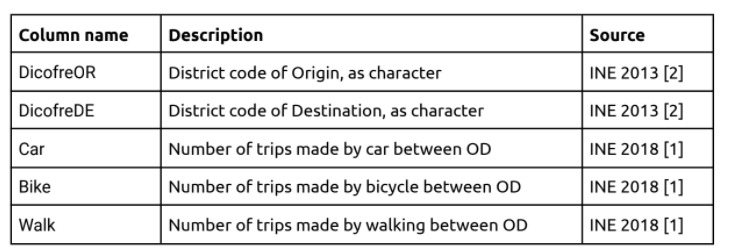

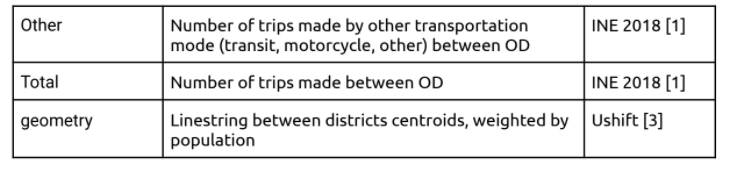

EDA on Lisbon Cycling Data

In [15]:
LisbonCyclingNetwork.shape

(186, 6)

In [16]:
#Reading some data samples from the dataframe to analyse data
LisbonCyclingNetwork.sample(4)

,id,nome,tipo,data_alt,length,geometry
149,2070,Azinhaga,exclusiva,2020-08-31T23:19:37+00:00,194.910411,"LINESTRING (-9.15695 38.77948, -9.15696 38.779..."
131,1758,Marquês da Fronteira,exclusiva,2020-08-20T19:00:58+00:00,231.199235,"LINESTRING (-9.15791 38.72989, -9.15989 38.72850)"
26,110,Oriente,exclusiva,2020-05-26T13:25:59+00:00,704.996840,"LINESTRING (-9.09691 38.79533, -9.09714 38.794..."
83,1218,Parque Vale da Montanha,None,2020-05-03T15:30:52+00:00,194.301852,"LINESTRING (-9.12574 38.74559, -9.12613 38.745..."


In [17]:
LisbonCyclingNetwork.info()
#There are Null values in typo

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        186 non-null    object  
 1   nome      186 non-null    object  
 2   tipo      139 non-null    object  
 3   data_alt  186 non-null    object  
 4   length    186 non-null    float64 
 5   geometry  186 non-null    geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 8.8+ KB


In [18]:
LisbonCyclingNetwork.describe()
#length is the only numerical attribute

,length
count,186.000000
mean,606.496627
std,854.518353
min,8.252509
25%,156.228606
50%,340.901954
75%,732.498845
max,7434.578769


In [19]:
len(set(LisbonCyclingNetwork['id']))
#Total no.of rows is same as that of the id values (unique attribute)

186

In [20]:
print(len(set(LisbonCyclingNetwork['nome'])))
#print(set(LisbonCyclingNetwork['nome']))

156


In [21]:
#len(set(LisbonCyclingNetwork['tipo']))
print(set(LisbonCyclingNetwork['tipo']))

{'', None, 'exclusiva'}


In [22]:
LisbonCyclingNetwork[LisbonCyclingNetwork['tipo']==""]

,id,nome,tipo,data_alt,length,geometry
12,52,Jardim da Quinta da Granja - Benfica,,2021-02-23T12:18:21+00:00,658.721308,"LINESTRING (-9.19311 38.75491, -9.19310 38.754..."
25,108,Rua Tomás da Fonseca,,2020-09-04T00:36:58+00:00,732.706214,"LINESTRING (-9.16628 38.75573, -9.16638 38.755..."
47,802,Av. Rovisco Pais,,2021-03-07T17:58:26+00:00,334.100724,"LINESTRING (-9.13677 38.73606, -9.13694 38.735..."
72,1013,Cruzamento R. Dona Filipa de Vilhena x Rua Arc...,,2020-09-03T21:21:43+00:00,56.093934,"LINESTRING (-9.14257 38.73898, -9.14206 38.739..."
73,1014,Cruzamento Av. Elias Garcia x Rua Arco do Cego,,2020-09-07T13:07:29+00:00,30.689555,"LINESTRING (-9.14263 38.73981, -9.14266 38.739..."
98,1434,Ligação da Av. Calouste Gulbekian à Ponte Gonç...,,2020-08-28T13:13:49+00:00,136.343070,"LINESTRING (-9.16311 38.73448, -9.16329 38.734..."
101,1461,Praça S.º Francisco de Assis,,2021-02-26T20:38:04+00:00,306.377164,"MULTILINESTRING ((-9.18081 38.76439, -9.18135 ..."
115,1623,Fontes Pereira de Melo,,2020-08-20T02:41:14+00:00,21.090268,"LINESTRING (-9.14535 38.73267, -9.14557 38.73275)"
116,1637,Ligação Av.Casal Ribeiro,,2021-03-22T13:27:37+00:00,8.252509,"LINESTRING (-9.14457 38.73337, -9.14449 38.73333)"
168,2384,Santa Cruz/Damaia - Buraca,,2021-03-21T17:58:44+00:00,558.237320,"LINESTRING (-9.20751 38.74521, -9.20738 38.745..."


In [23]:
LisbonCyclingNetwork[LisbonCyclingNetwork['tipo']==None]

,id,nome,tipo,data_alt,length,geometry


In [24]:
x=LisbonCyclingNetwork.groupby('tipo')
x.first()

,id,nome,data_alt,length,geometry
tipo,,,,,
,52,Jardim da Quinta da Granja - Benfica,2021-02-23T12:18:21+00:00,658.721308,"LINESTRING (-9.19311 38.75491, -9.19310 38.754..."
exclusiva,1,Radial de Benfica - Campolide - Pq. Ed. VII,2021-03-07T18:01:15+00:00,5299.171879,"LINESTRING (-9.20146 38.73964, -9.20121 38.739..."


<Figure size 1080x1080 with 0 Axes>

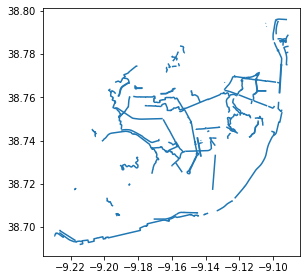

In [25]:
# Plot overlayed maps
plt.figure(figsize= (15,15))
LisbonCyclingNetwork.plot(markersize=0.5)
plt.tight_layout()
#plt.savefig('overlay_map.png')
plt.show()

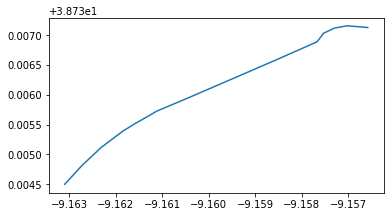

In [26]:
LisbonCyclingNetwork.sample(1).plot(markersize=0.5)

Each row on the LisbonCyclingNetwork denotes a line segment (route)

EDA on Lisbon Population Dataset

In [27]:
LisbonDistricts_Geom_Population.shape

(24, 4)

In [28]:
LisbonDistricts_Geom_Population.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Dicofre         24 non-null     object  
 1   DistrictName    24 non-null     object  
 2   Population2011  24 non-null     float64 
 3   geometry        24 non-null     geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 896.0+ bytes


In [29]:
LisbonDistricts_Geom_Population.sample(5)

,Dicofre,DistrictName,Population2011,geometry
4,110610,CAMPOLIDE,15460.0,"MULTIPOLYGON (((-9.16696 38.72308, -9.16800 38..."
0,110601,AJUDA,15617.0,"MULTIPOLYGON (((-9.19196 38.70134, -9.19198 38..."
18,110662,PARQUE DAS NAÇÕES,21025.0,"MULTIPOLYGON (((-9.09532 38.75344, -9.09577 38..."
17,110661,MISERICÓRDIA,13044.0,"MULTIPOLYGON (((-9.14197 38.70707, -9.14187 38..."
15,110659,CAMPO DE OURIQUE,22120.0,"MULTIPOLYGON (((-9.15660 38.71446, -9.15693 38..."


<Figure size 1080x1080 with 0 Axes>

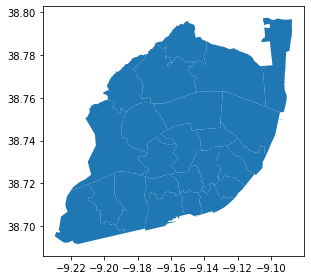

In [30]:
# Plot overlayed maps
plt.figure(figsize= (15,15))
LisbonDistricts_Geom_Population.plot(markersize=0.5)
plt.tight_layout()
#plt.savefig('overlay_map.png')
plt.show()

EDA on Travel Survey Data

In [31]:
TravelSurveyLisbon.shape

(574, 8)

In [32]:
TravelSurveyLisbon.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   DicofreOR  574 non-null    object  
 1   DicofreDE  574 non-null    object  
 2   Car        574 non-null    float64 
 3   Bike       574 non-null    float64 
 4   Walk       574 non-null    float64 
 5   Other      574 non-null    float64 
 6   Total      574 non-null    float64 
 7   geometry   574 non-null    geometry
dtypes: float64(5), geometry(1), object(2)
memory usage: 36.0+ KB


In [33]:
TravelSurveyLisbon.sample(5)

,DicofreOR,DicofreDE,Car,Bike,Walk,Other,Total,geometry
507,110665,110611,211.0,0.0,0.0,510.0,721.0,"LINESTRING (-9.13344 38.71361, -9.18601 38.76404)"
452,110662,110664,443.0,0.0,0.0,320.0,763.0,"LINESTRING (-9.09847 38.77752, -9.15533 38.78553)"
512,110665,110654,307.0,15.0,562.0,1018.0,1903.0,"LINESTRING (-9.13344 38.71361, -9.14454 38.75228)"
104,110610,110633,585.0,0.0,21.0,60.0,666.0,"LINESTRING (-9.16677 38.72954, -9.11734 38.76931)"
379,110659,110663,121.0,0.0,25.0,422.0,569.0,"LINESTRING (-9.16516 38.71783, -9.12584 38.72864)"


In [34]:
len(set(TravelSurveyLisbon['DicofreOR'])) #24
len(set(TravelSurveyLisbon['DicofreDE']))

24

In [35]:
TravelSurveyLisbon.describe()

,Car,Bike,Walk,Other,Total
count,574.000000,574.000000,574.00000,574.000000,574.000000
mean,575.378049,8.630662,533.60453,407.040070,1524.641115
std,917.808710,39.397728,1909.12336,525.984525,2975.357790
min,0.000000,0.000000,0.00000,0.000000,2.000000
25%,86.250000,0.000000,0.00000,56.500000,257.250000
50%,254.000000,0.000000,23.00000,238.500000,718.000000
75%,631.500000,0.000000,188.50000,525.750000,1659.500000
max,7910.000000,516.000000,19398.00000,4872.000000,28740.000000


<Figure size 1080x1080 with 0 Axes>

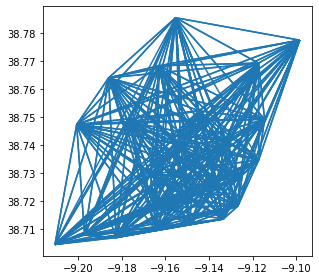

In [36]:
# Plot overlayed maps
plt.figure(figsize= (15,15))
TravelSurveyLisbon.plot(markersize=0.5)
plt.tight_layout()
#plt.savefig('overlay_map.png')
plt.show()

In [37]:
lisbon_boundaries = gpd.read_file('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-2/main/datasets/Lisbon.geojson')

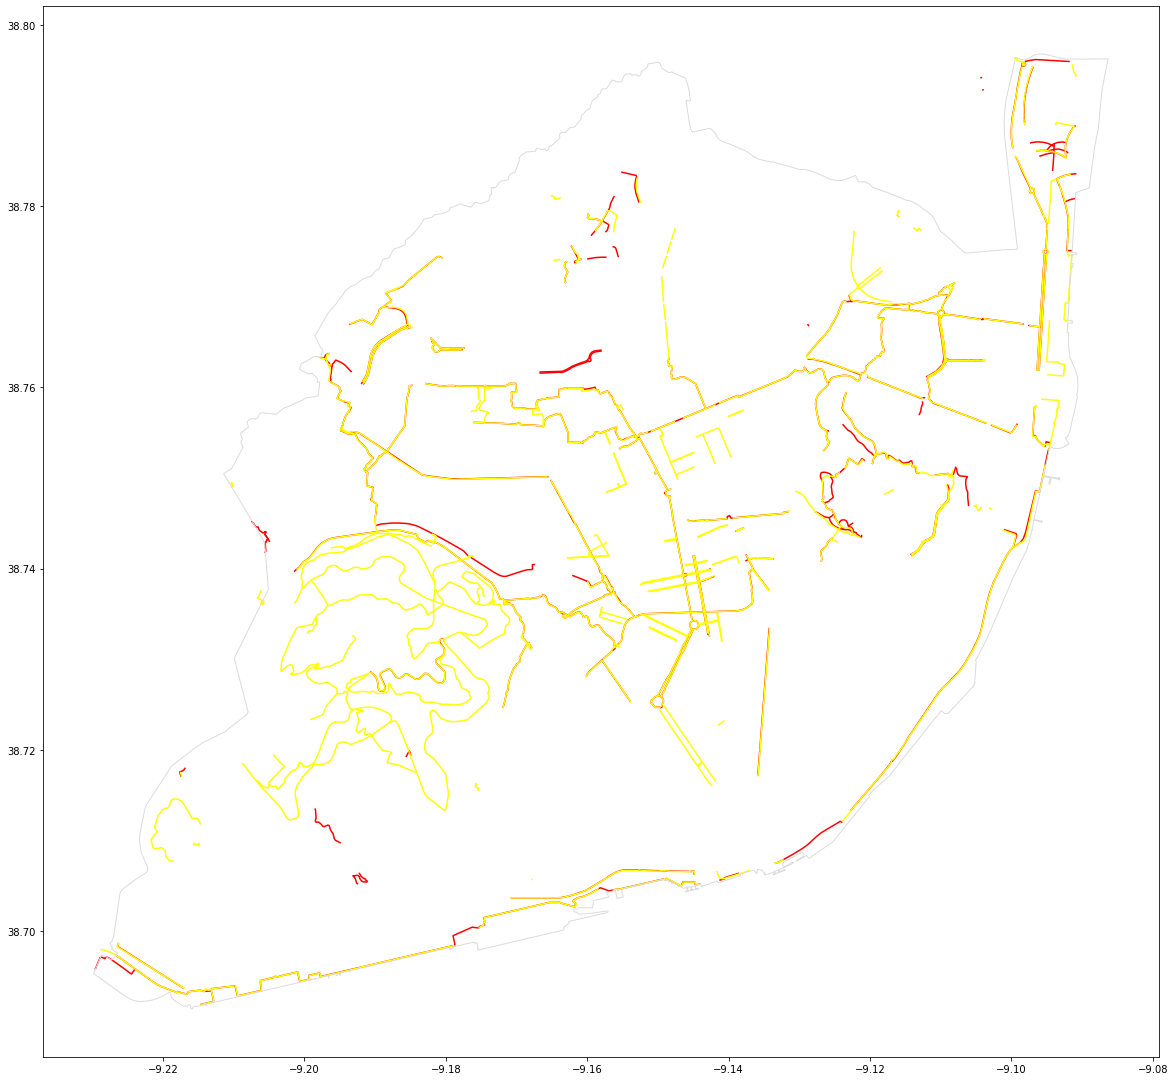

In [38]:
ax = lisbon_boundaries.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)
LisbonCyclingNetwork.plot(color = 'red', ax = ax)
CyclingNetwork.plot(ax =ax, color = 'yellow')

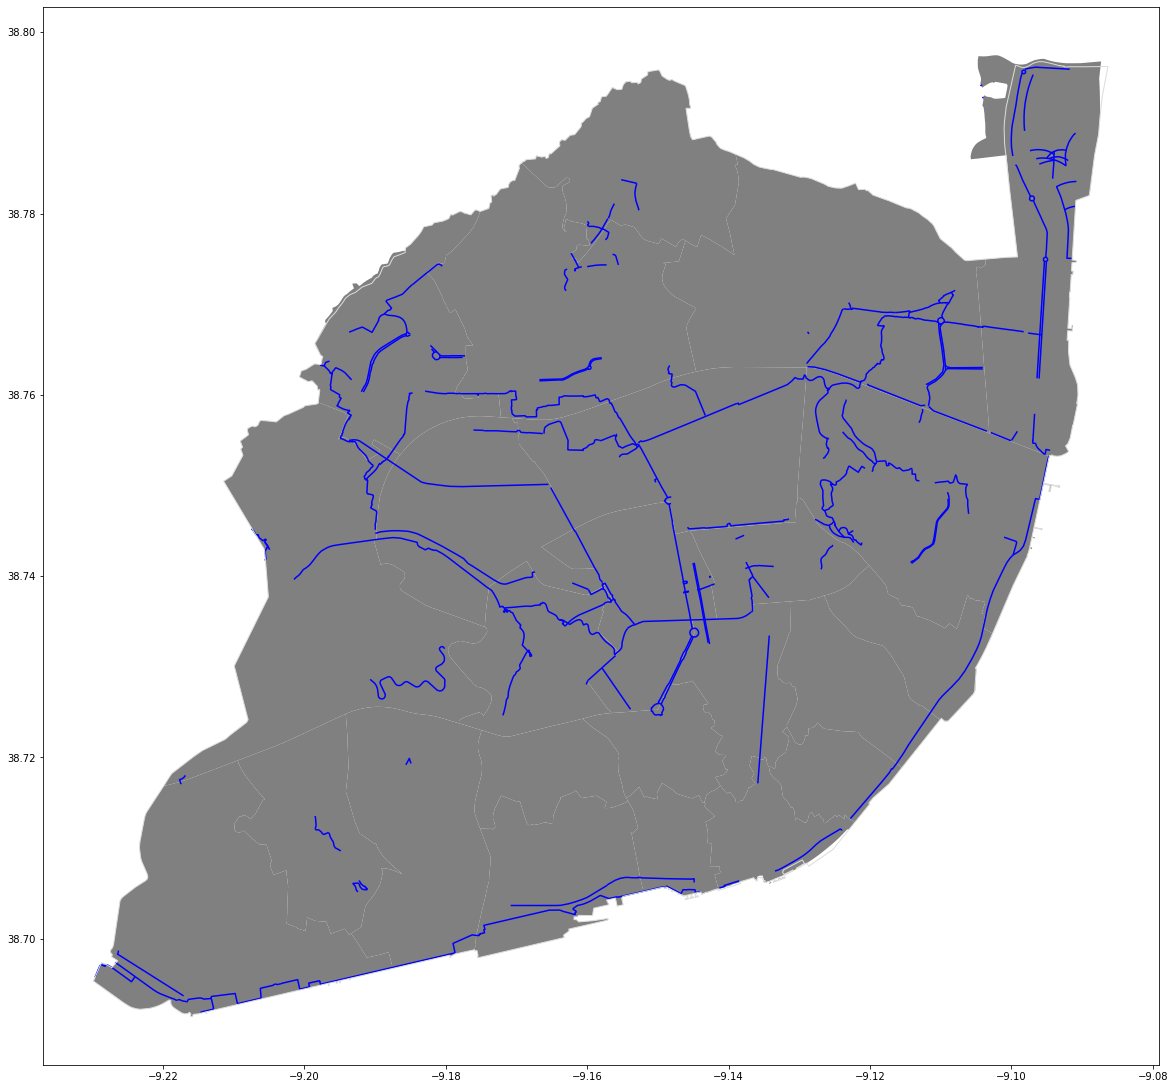

In [39]:
ax = lisbon_boundaries.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)
LisbonCyclingNetwork.plot(color = 'blue', ax = ax)
LisbonDistricts_Geom_Population.plot(color = 'grey', ax = ax)

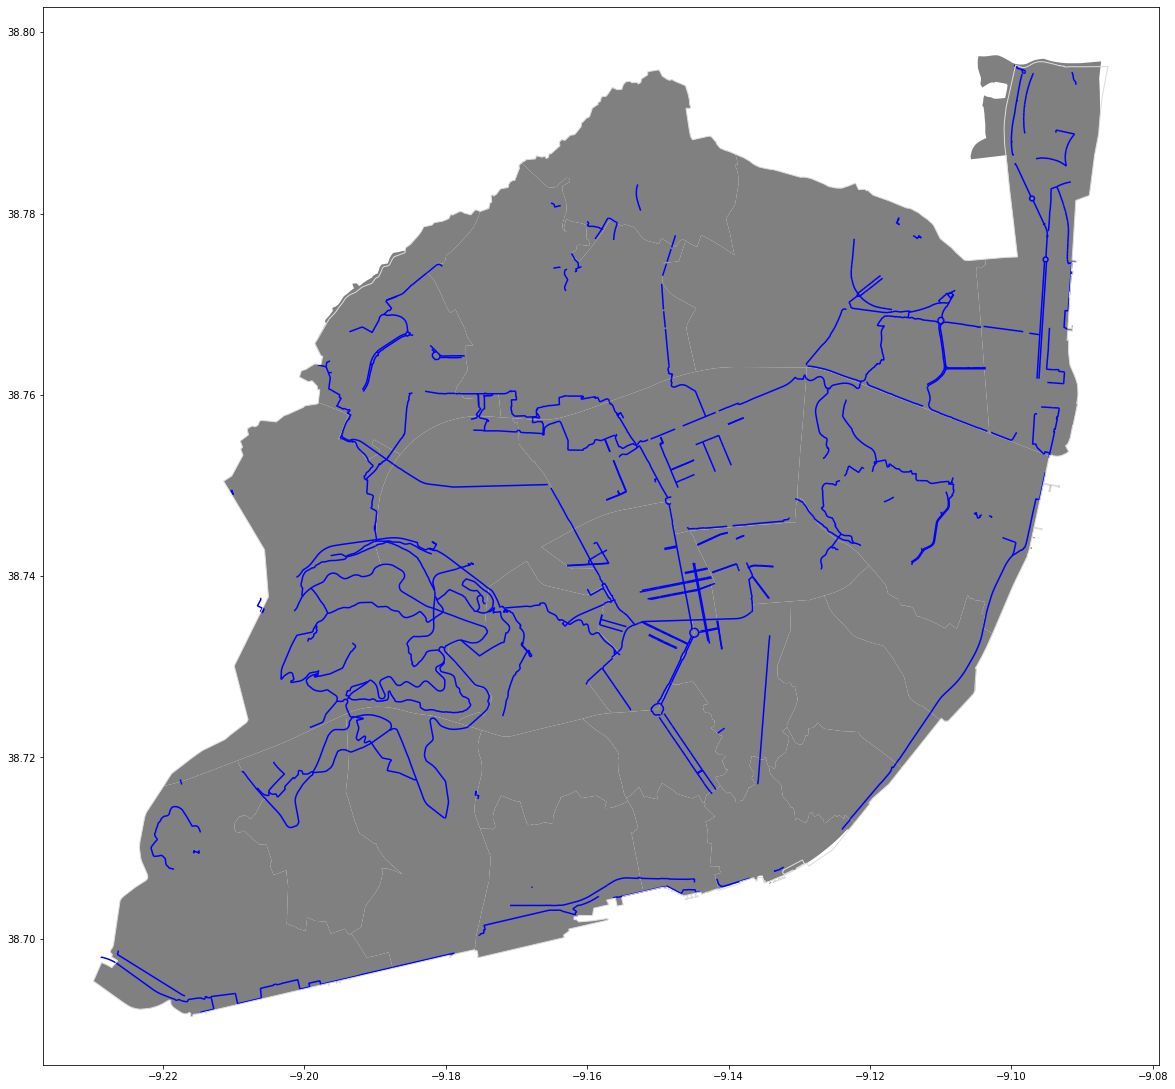

In [40]:
ax = lisbon_boundaries.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)
CyclingNetwork.plot(color = 'blue', ax = ax)
LisbonDistricts_Geom_Population.plot(color = 'grey', ax = ax)

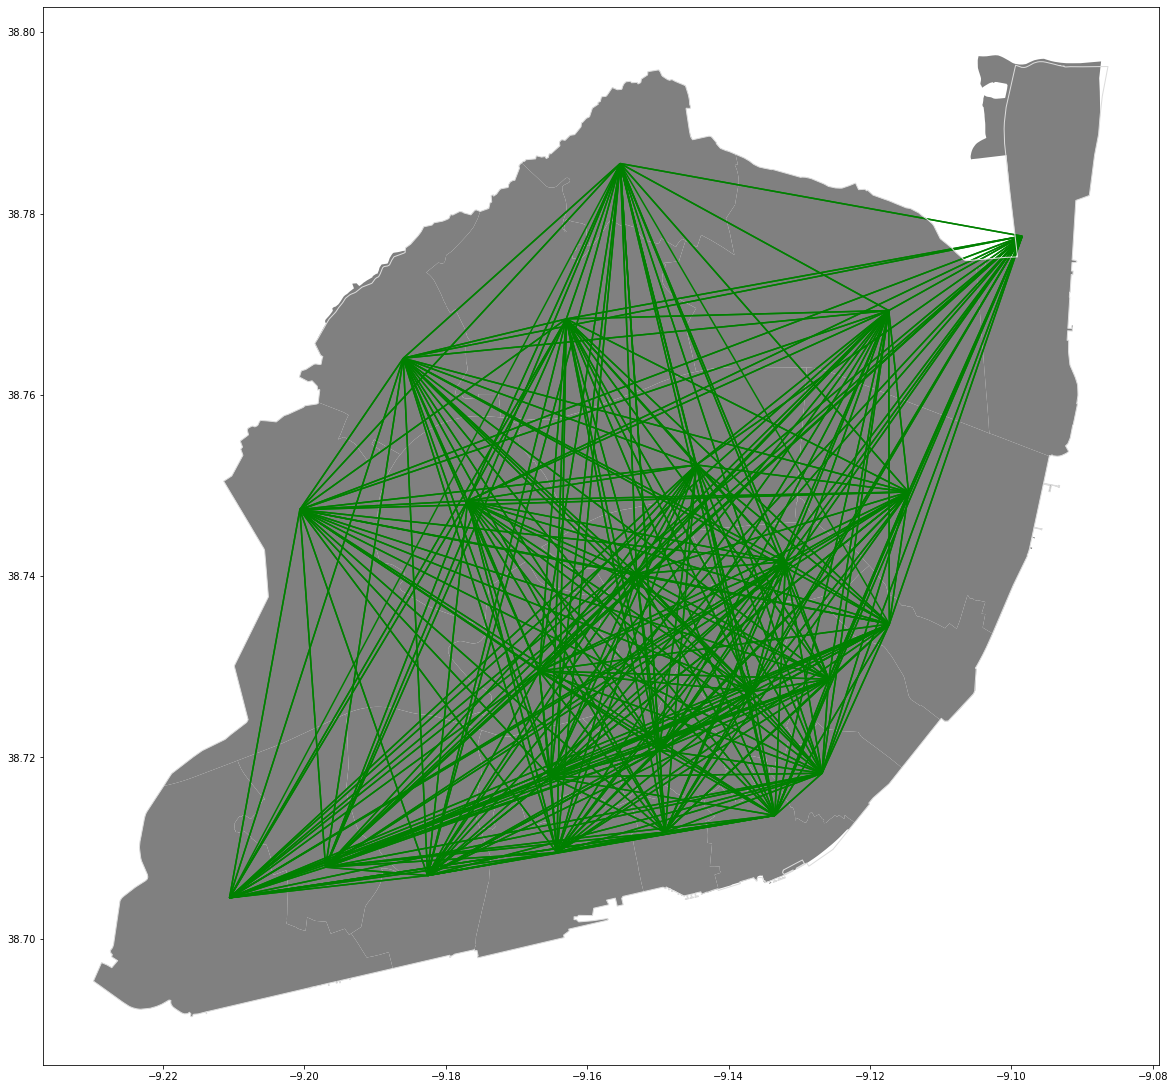

In [41]:
ax = lisbon_boundaries.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)
TravelSurveyLisbon.plot(color = 'green', ax = ax)
LisbonDistricts_Geom_Population.plot(color = 'grey', ax = ax)

##Connecting the dots



*   The “missing-link” can be a geometry network problem or/and a problem that takes
population behaviour and needs into account;
*   Recommended datasets for solving the challenge:



> --> Cycling network, Mobility survey data or manual bike counts data, Digital Elevation Model, Collision data reports, Home and workplaces density


*   Try to fill in the template from start to finish with a straightforward dummy
solution first and iterate afterwards. This is a challenge where is it easy to start
simple;

*  If possible, don’t forget to explain your decisions.


### References
[Mobility survey in the Metropolitan Areas of Porto and Lisboa : 2017](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_publicacoes&PUBLICACOESpub_boui=349495406&PUBLICACOESmodo=2&&fbclid=IwAR2QzUZK0mUSEdKySZe1HqmObblKWR62vIyVhtVAAxrQhyNllna-DDfp2bk&xlang=en)

[Resident Population](https://censos.ine.pt/xportal/xmain?xpid=CENSOS&xpgid=censos_quadros)


[Lisbon streets's inclinations](http://ushift.tecnico.ulisboa.pt/data/)

[Cartography](https://www.dgterritorio.gov.pt/cartografia/cartografia-tematica/caop?language=en)

#Understanding Travel survey

In [42]:
TravelSurveyLisbon.head()

,DicofreOR,DicofreDE,Car,Bike,Walk,Other,Total,geometry
0,110601,110601,188.0,13.0,623.0,117.0,940.0,"LINESTRING (-9.19700 38.70790, -9.19700 38.70790)"
1,110601,110602,173.0,3.0,404.0,231.0,811.0,"LINESTRING (-9.19700 38.70790, -9.18257 38.70698)"
2,110601,110607,41.0,0.0,0.0,24.0,64.0,"LINESTRING (-9.19700 38.70790, -9.11726 38.73471)"
3,110601,110608,139.0,0.0,9.0,377.0,524.0,"LINESTRING (-9.19700 38.70790, -9.20064 38.74734)"
4,110601,110610,49.0,0.0,0.0,64.0,112.0,"LINESTRING (-9.19700 38.70790, -9.16677 38.72954)"


In [43]:
bikesurvey = TravelSurveyLisbon.drop(columns = ['Car','Walk', 'Other'])
bikesurvey['Bike_ratio'] = bikesurvey['Bike']/bikesurvey['Total']
bikesurvey = bikesurvey.drop(columns = ['Total'])
bikesurvey = bikesurvey.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=['Bike_ratio']).fillna(0)
bikesurvey.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



,DicofreOR,DicofreDE,Bike,geometry,Bike_ratio
0,110601,110601,13.0,"LINESTRING (-9.19700 38.70790, -9.19700 38.70790)",0.013830
1,110601,110602,3.0,"LINESTRING (-9.19700 38.70790, -9.18257 38.70698)",0.003699
10,110601,110654,3.0,"LINESTRING (-9.19700 38.70790, -9.14454 38.75228)",0.020134
11,110601,110655,3.0,"LINESTRING (-9.19700 38.70790, -9.13196 38.74159)",0.008929
21,110601,110665,28.0,"LINESTRING (-9.19700 38.70790, -9.13344 38.71361)",0.235294


In [44]:
bikesurvey.describe()

,Bike,Bike_ratio
count,122.000000,122.000000
mean,40.606557,0.031413
std,77.725471,0.069633
min,3.000000,0.000260
25%,13.000000,0.005475
50%,18.000000,0.009521
75%,31.000000,0.027954
max,516.000000,0.525458


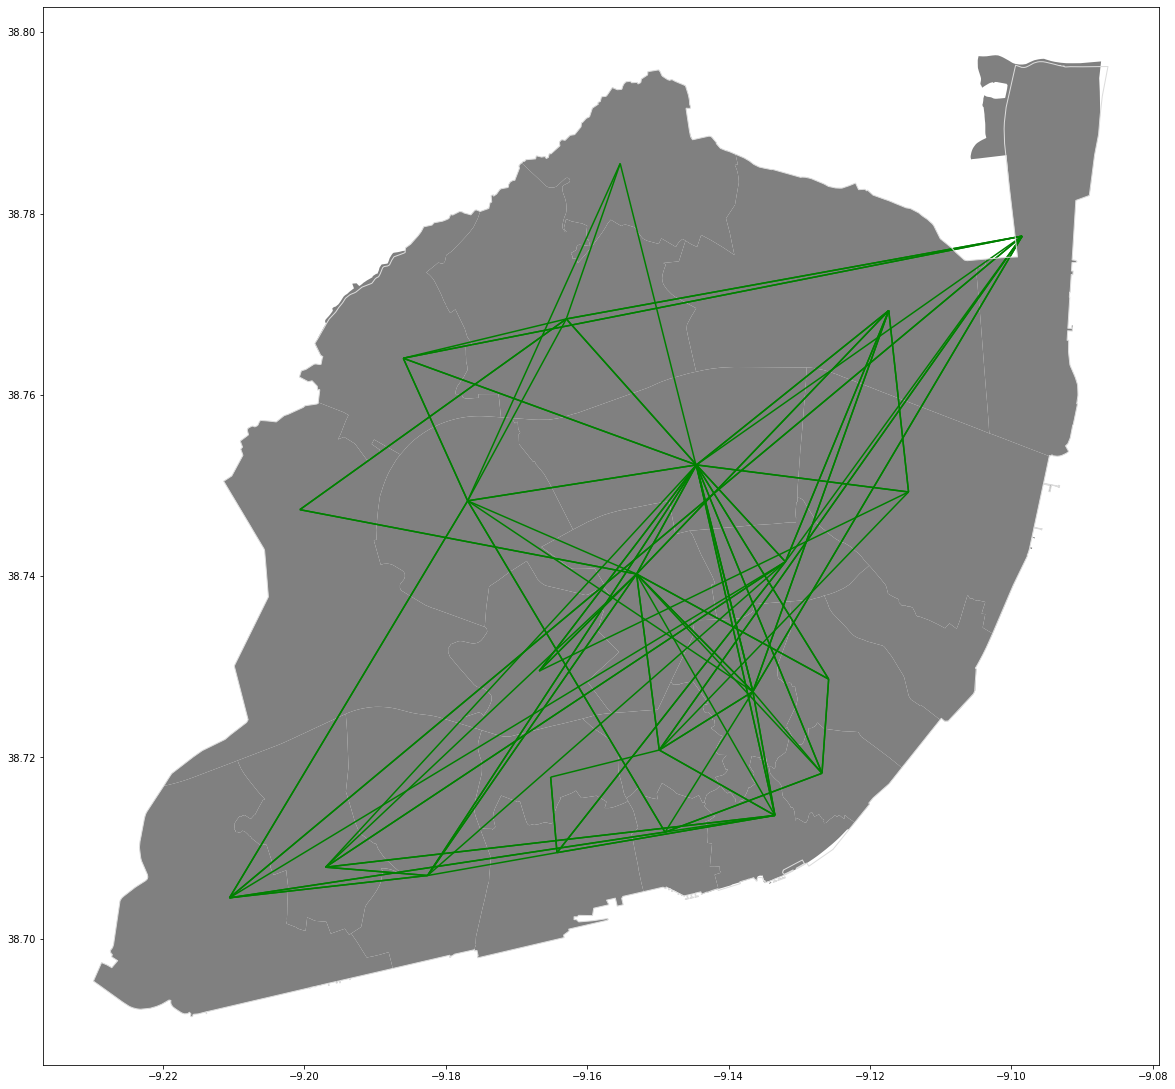

In [45]:
ax = lisbon_boundaries.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)
bikesurvey.plot(color = 'green', ax = ax)
LisbonDistricts_Geom_Population.plot(color = 'grey', ax = ax)

The mean of bike vs total ratio is 0.031413. Let us consider that a threshold

In [46]:
dis_data=LisbonDistricts_Geom_Population.drop(columns=['Population2011','geometry'])
dis_data.head(2)

,Dicofre,DistrictName
0,110601,AJUDA
1,110602,ALCÂNTARA


In [47]:
#Merging TravelSurveyLisbon and LisbonDistricts_Geom_Population datasets 
#To understand the origin and destination district names and rescpetive population
merged_inner = pd.merge(left=TravelSurveyLisbon, right=dis_data, left_on='DicofreOR', right_on='Dicofre')
merged_inner=merged_inner.drop(columns='Dicofre')
merged_inner = merged_inner.rename(columns = {'DistrictName': 'ORDisName'}, inplace = False)
merged_inner1=pd.merge(left=merged_inner, right=dis_data, left_on='DicofreDE', right_on='Dicofre')
merged_inner1=merged_inner1.drop(columns='Dicofre')
merged_inner1 = merged_inner1.rename(columns = {'DistrictName': 'DEDisName'}, inplace = False)
merged_inner1.head(4)

,DicofreOR,DicofreDE,Car,Bike,Walk,Other,Total,geometry,ORDisName,DEDisName
0,110601,110601,188.0,13.0,623.0,117.0,940.0,"LINESTRING (-9.19700 38.70790, -9.19700 38.70790)",AJUDA,AJUDA
1,110602,110601,206.0,3.0,320.0,236.0,765.0,"LINESTRING (-9.18257 38.70698, -9.19700 38.70790)",ALCÂNTARA,AJUDA
2,110607,110601,0.0,0.0,0.0,5.0,5.0,"LINESTRING (-9.11726 38.73471, -9.19700 38.70790)",BEATO,AJUDA
3,110608,110601,118.0,0.0,11.0,22.0,151.0,"LINESTRING (-9.20064 38.74734, -9.19700 38.70790)",BENFICA,AJUDA


In [48]:
Typonull=LisbonCyclingNetwork[LisbonCyclingNetwork['tipo'].isna()]
Typonull.head(4)

,id,nome,tipo,data_alt,length,geometry
4,7,Avenida Frei Miguel Contreiras,None,2020-05-03T15:30:52+00:00,708.073913,"LINESTRING (-9.13148 38.74635, -9.13162 38.746..."
14,56,FC UL,None,2020-05-03T15:30:52+00:00,35.518820,"LINESTRING (-9.15596 38.75544, -9.15587 38.755..."
19,73,Bela-Vista - Av. Afonso Costa,None,2020-05-03T15:30:52+00:00,358.194050,"LINESTRING (-9.12524 38.74344, -9.12536 38.743..."
20,86,Ciclovia Mercado Lumiar - Escola Básica,None,2020-05-03T15:30:52+00:00,304.921463,"LINESTRING (-9.16298 38.77149, -9.16308 38.771..."


In [49]:
Typonull1=LisbonCyclingNetwork[LisbonCyclingNetwork['tipo']=='']
Typonull1.head(4)

,id,nome,tipo,data_alt,length,geometry
12,52,Jardim da Quinta da Granja - Benfica,,2021-02-23T12:18:21+00:00,658.721308,"LINESTRING (-9.19311 38.75491, -9.19310 38.754..."
25,108,Rua Tomás da Fonseca,,2020-09-04T00:36:58+00:00,732.706214,"LINESTRING (-9.16628 38.75573, -9.16638 38.755..."
47,802,Av. Rovisco Pais,,2021-03-07T17:58:26+00:00,334.100724,"LINESTRING (-9.13677 38.73606, -9.13694 38.735..."
72,1013,Cruzamento R. Dona Filipa de Vilhena x Rua Arc...,,2020-09-03T21:21:43+00:00,56.093934,"LINESTRING (-9.14257 38.73898, -9.14206 38.739..."


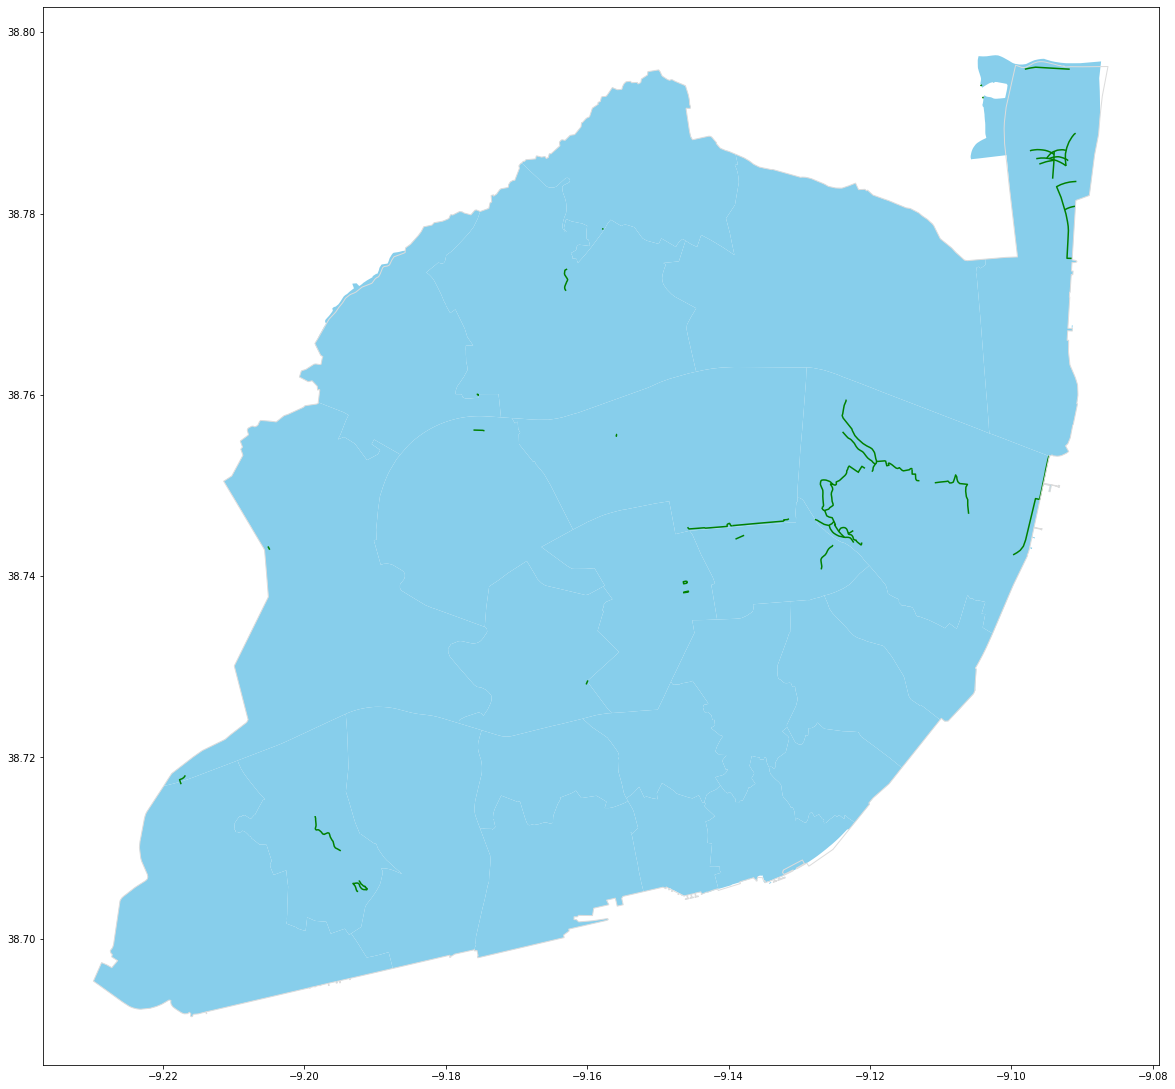

In [50]:
ax = lisbon_boundaries.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)
Typonull.plot(color = 'green', ax = ax)
LisbonDistricts_Geom_Population.plot(color = 'skyblue', ax = ax)

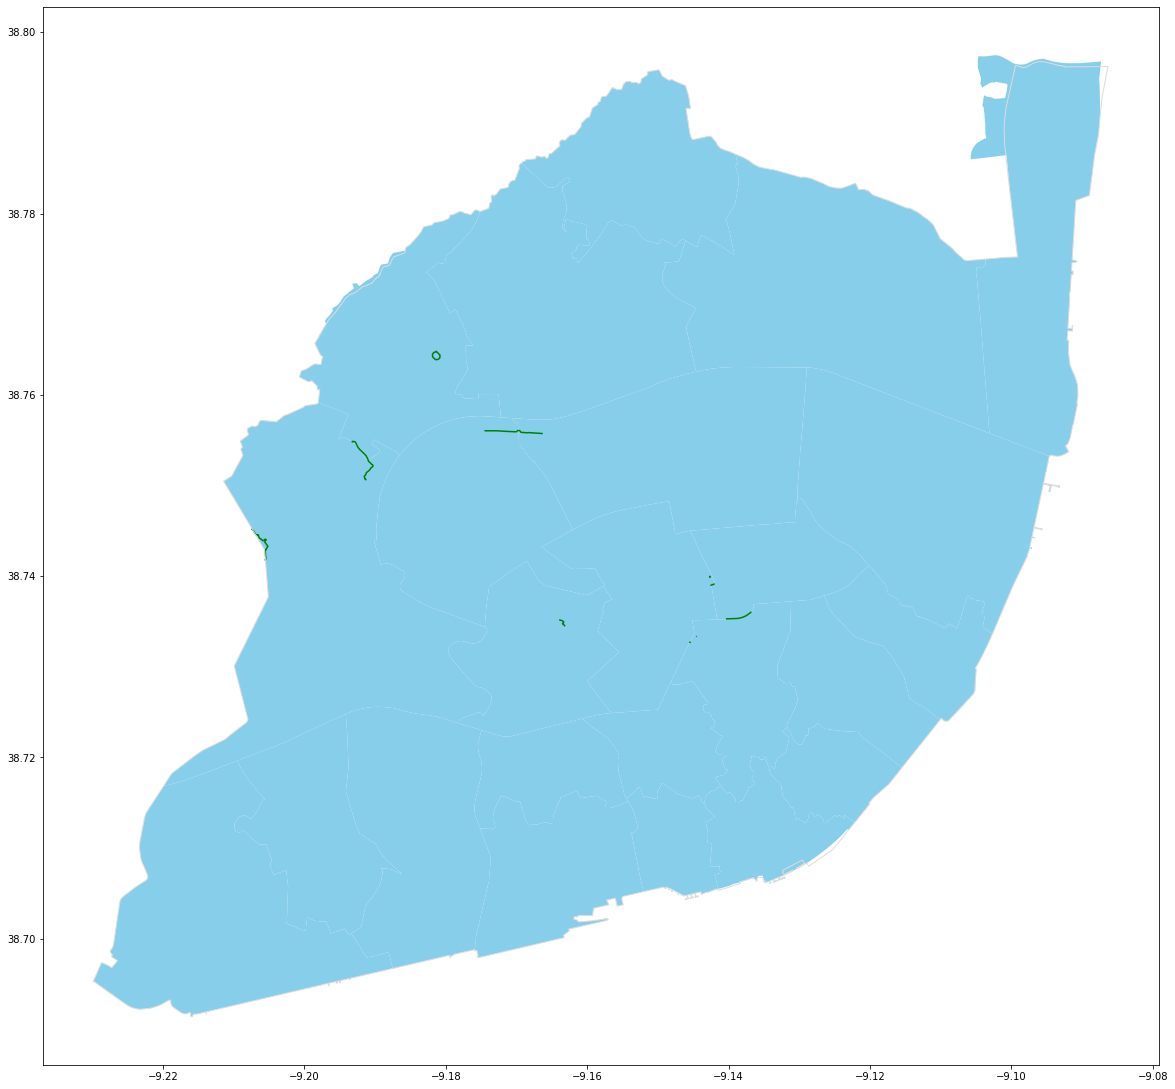

In [51]:
ax = lisbon_boundaries.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)
Typonull1.plot(color = 'green', ax = ax)
LisbonDistricts_Geom_Population.plot(color = 'skyblue', ax = ax)

## **Next steps**



*  Understanding how to connect the datasets
*  Importing data from references







## Conclusions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

### Future Work
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀